In [ ]:
# 1.Read the dataset.
# 2.Distinguish the feature and target set and divide the data set into training and test sets.
# 3.Normalize the train and test data.
# 4.Initialize and build the model. Identify the points of improvement and implement the same.
# 5.Print the accuracy score and confusion matrix.

In [1]:
# Import necessary Library for reading the file and calculation.
import pandas as pd
import numpy as np


In [2]:
# Loading the Churn Modeling Dataset
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
#quick overview of the key statistical properties of the numerical columns in the DataFrame.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Checking the null value in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#display the data types of each column (or series) within a DataFrame
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Delete the unecesary data into dataset it is no longer needed
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
# Current columns present
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
# describe the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [14]:
# to visualize and Distinguish the feature and target set
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# creating a histogram visualization of two sets of data, x and y,
def visualization(x, y, xlabel):
    # specifies the size of the figure to be 10 units wide and 5 units tall.
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [16]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

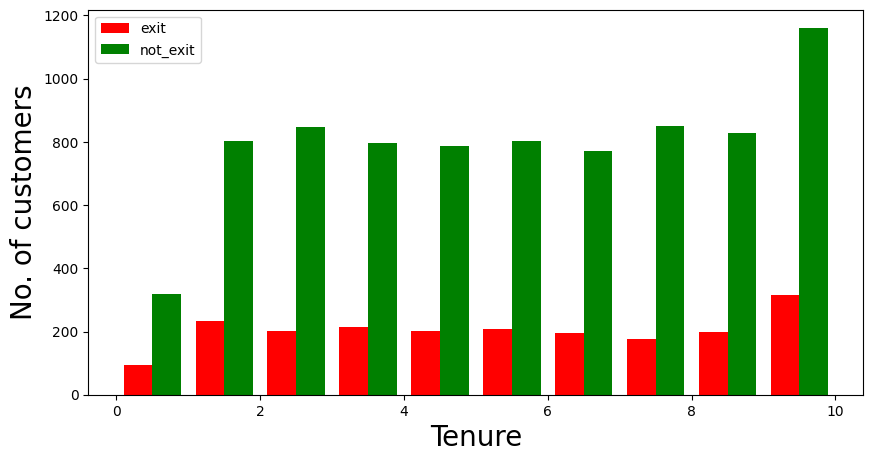

In [17]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [18]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

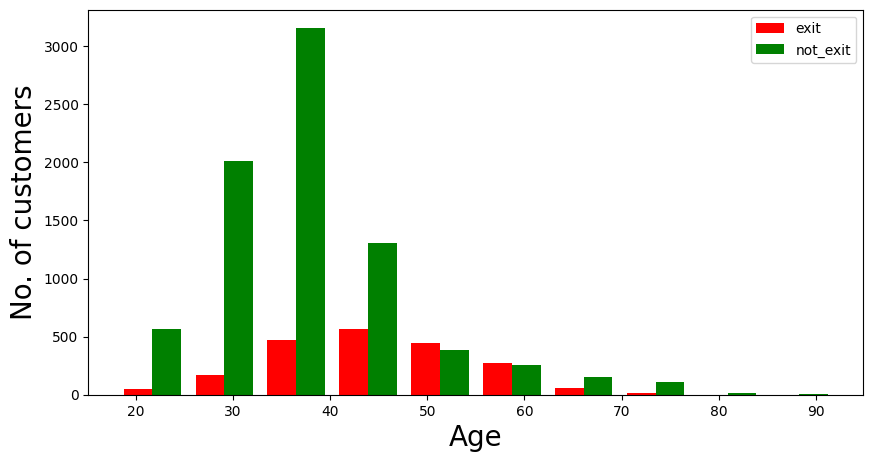

In [19]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [20]:
#categorical data
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [21]:

df = pd.concat([df,gender,states], axis = 1)

In [22]:
# In the x we use this data column name for training the data
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [23]:
# store target column in y frame
y = df['Exited']

In [24]:
# Here we split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
# standard scaling for better accuracy
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train


array([[-2.06499282e-01, -3.69743785e-01,  1.38411988e+00, ...,
         9.10816686e-01, -5.83508846e-01, -5.74710940e-01],
       [ 1.09812710e+00, -8.22611131e-02, -1.73181910e+00, ...,
         9.10816686e-01, -5.83508846e-01, -5.74710940e-01],
       [-1.71820922e+00, -1.13636424e+00, -6.93172774e-01, ...,
        -1.09791577e+00, -5.83508846e-01, -5.74710940e-01],
       ...,
       [-1.26262540e+00, -3.69743785e-01, -7.41890232e-04, ...,
         9.10816686e-01, -5.83508846e-01,  1.74000516e+00],
       [ 5.84271454e-04, -1.23219180e+00, -7.41890232e-04, ...,
         9.10816686e-01,  1.71377008e+00, -5.74710940e-01],
       [ 2.59438713e-01, -2.73916228e-01, -1.38560366e+00, ...,
         9.10816686e-01, -5.83508846e-01,  1.74000516e+00]])

In [28]:
X_test

array([[-9.00229186e-01,  1.09394001e-01, -3.46957332e-01, ...,
         9.10816686e-01, -5.83508846e-01, -5.74710940e-01],
       [ 6.21834932e-01,  1.25932469e+00, -7.41890232e-04, ...,
         9.10816686e-01, -5.83508846e-01, -5.74710940e-01],
       [-1.22120869e+00,  3.96876673e-01, -3.46957332e-01, ...,
         9.10816686e-01,  1.71377008e+00, -5.74710940e-01],
       ...,
       [ 8.34176928e-02,  2.02594515e+00, -1.03938822e+00, ...,
         9.10816686e-01, -5.83508846e-01,  1.74000516e+00],
       [-1.02957505e-01,  1.09394001e-01,  1.38411988e+00, ...,
        -1.09791577e+00, -5.83508846e-01, -5.74710940e-01],
       [ 7.46085064e-01,  8.76014460e-01,  6.91688993e-01, ...,
         9.10816686e-01, -5.83508846e-01, -5.74710940e-01]])

In [30]:
#Keras is primarily used for developing and training deep learning models.
import keras
import tensorflow as tf
from tensorflow import keras


In [31]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [32]:
#initializing the model and configuring it
model=Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [34]:
# fitting the model
model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
700/700 [==============================] - 2s 2ms/step - loss: 0.4150 - accuracy: 0.8224
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8519
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8561
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8576
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3471 - accuracy: 0.8576
Epoch 6/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3454 - accuracy: 0.8584
Epoch 7/100
700/700 [==============================] - 2s 3ms/step - loss: 0.3424 - accuracy: 0.8593
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8586
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8603
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3376 - accura

In [36]:
# getting prediction output on x_test

y_pred_val=model.predict(X_test)
y_pred_val[y_pred_val>0.5]=1
y_pred_val[y_pred_val <0.5]=0

94/94 [==============================] - 0s 2ms/step


In [41]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_val=confusion_matrix(y_test,y_pred_val)
cm_val


array([[2246,  140],
       [ 294,  320]])

In [39]:
# Accuracy score for model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_val)
print("Accuracy:", accuracy)


Accuracy: 0.8553333333333333
